In [8]:
import matplotlib.pyplot as plt

import pandas as pd

import bagToCSV

In [9]:
bag_path: str = '/IdeaProjects/TylerAAMAS/rosbag2_2025_10_07-12_05_35_0.db3'
_message_gen = bagToCSV.get_message_generator(bag_path)

set_of_nodes: set[str] = {"MakePastaWithTomatoSauce_2", "MakePastaWithTomatoSauce_55", "MakeSalad_108",
                          "MakeSalad_444", "MakePastaWithTomatoSauce_391", "MakePastaWithTomatoSauce_218",
                          "MakeSalad_163", "MakeSalad_271", }

# see bagToCSV.ReducedNodeMsg
my_dataset_generator = bagToCSV.filter_status_by_node_names(_message_gen, set_of_nodes)

In [10]:
################ Chatbot special ################
data = ((x.id, x.timestamp, x.node_name, x.num_resources) for x in my_dataset_generator)

# Convert to DataFrame
df = pd.DataFrame(data, columns=["id", "timestamp", "node_name", "counter"])

# Sort by timestamp and node
df = df.sort_values(by=["timestamp", "node_name"])

# Pivot the data with forward fill to handle missing values
df_pivot = df.pivot_table(index="timestamp", columns="node_name", values="counter", aggfunc="last")
df_pivot = df_pivot.ffill().fillna(0)

[INFO] [1759870389.108780287] [rosbag2_storage]: Opened database '/IdeaProjects/TylerAAMAS/rosbag2_2025_10_07-12_05_35_0.db3' for READ_ONLY.


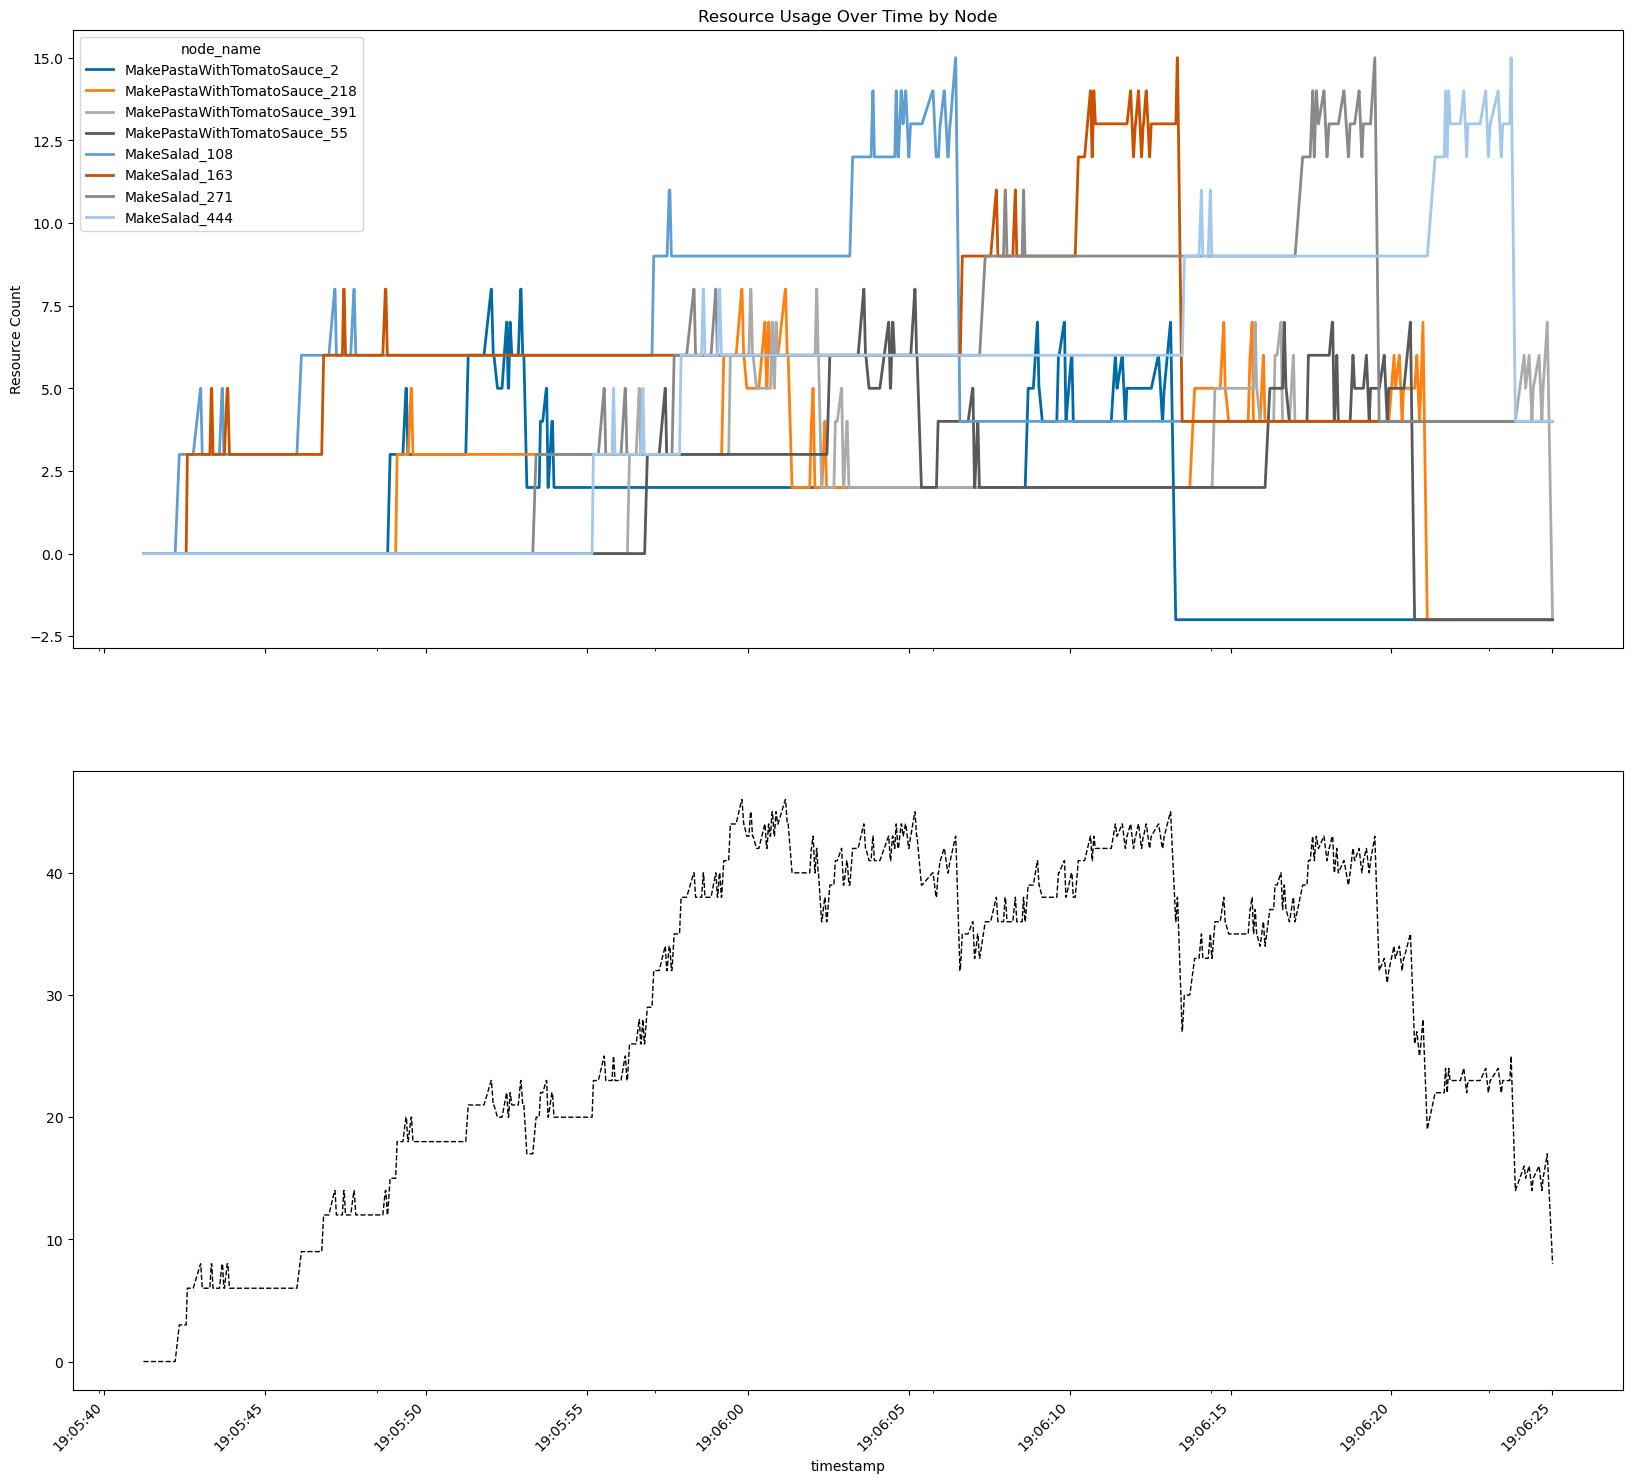

In [11]:
# Plot stacked bar chart
plt.style.use('tableau-colorblind10')
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(20, 20), sharex=True)
# fig, ax = plt.subplots(figsize=(10, 6))

# looks better when the solid lines go over the dashed line and are thicker
df_pivot.sum(axis=1).plot(style='--', label='Total', linewidth=1, color='black')
df_pivot.plot(kind="line", stacked=False, ax=ax, linewidth=2)

# Set labels and title
ax.set_title("Resource Usage Over Time by Node")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Resource Count")
plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig("foo.png")
plt.show()

In [12]:
# Remember, we are streaming the messages, so need to re-init after using them up above
_message_gen = bagToCSV.get_message_generator(bag_path)
my_dataset_generator = bagToCSV.filter_status_by_node_names(_message_gen, set_of_nodes)

In [13]:
data = ((x.id, x.timestamp, x.node_name, x.activation_potential) for x in my_dataset_generator)

# Convert to DataFrame
df = pd.DataFrame(data, columns=["id", "timestamp", "node_name", "activation"])

# Sort by timestamp and node
df = df.sort_values(by=["timestamp", "node_name"])

# Pivot the data with forward fill to handle missing values
df_pivot = df.pivot_table(index="timestamp", columns="node_name", values="activation", aggfunc="last")
df_pivot = df_pivot.ffill().fillna(0)

[INFO] [1759870392.951410675] [rosbag2_storage]: Opened database '/IdeaProjects/TylerAAMAS/rosbag2_2025_10_07-12_05_35_0.db3' for READ_ONLY.


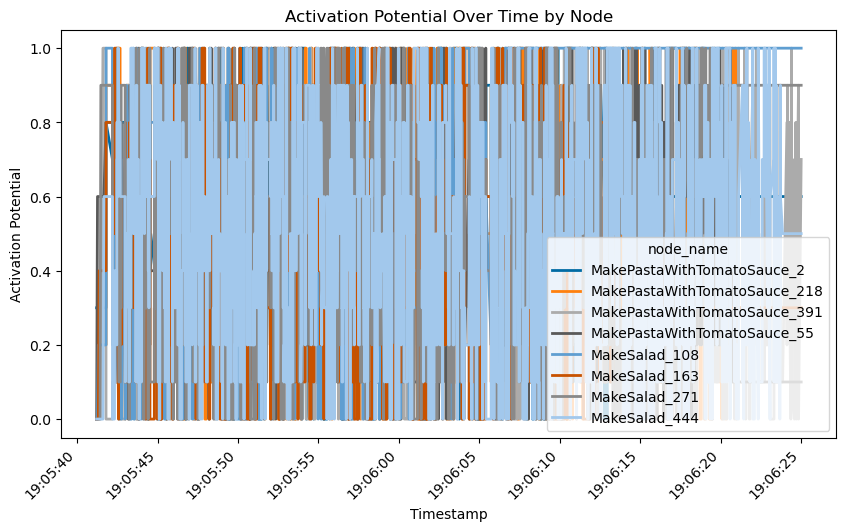

In [14]:
# Plot activation potential
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(10, 6))

df_pivot.plot(kind="line", stacked=False, ax=ax, linewidth=2)

# Set labels and title
ax.set_title("Activation Potential Over Time by Node")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Activation Potential")
plt.xticks(rotation=45)
# plt.tight_layout()
# plt.savefig("foo.png")
plt.show()